<div class="alert alert-block alert-info">
<h3>Student(s) Information</h3> Please provide information about yourself.<br>
<b>Name1</b>: Xinyu Meng<br>
<b>Name2 (optional) </b>:<br>
<b>NetID 1</b>: xm73<br>
<b>NetID 2 (optional)</b>:<br>
<b>Group Project Declaration</b> (please provide a brief description of your partners contribution to the project. Do not discuss with partner before writing this):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>:      
X.M

<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

### CS 439 - Introduction to Data Science
### Fall 2022

# Midsemester Project : Twitter Data Analysis

### Due Date : Wednesday November 23rd, 2022 by 11:59 PM 


### About this project
This is your mid-semester project. You can work on this project in two ways.
    
#### You can work with a partner
Only one partner (max two per group) is allowed. Each person in the group is expected to contribute equally to project. The team needs to do work equivalent to 2 individuals. We will be strict in grading criteria for groups. The team also needs to work hard to find good answers for Part 1 and Part 7. A post questionaire may be given to assess each person contribution. Each person in the team MUST submit a copy of the project. You MUST complete this survey by 11/10 to work as a team <a href="https://forms.gle/2qcog71UqQsgovCB8">CLICK HERE TO FILL THE SURVEY </a>

#### You can work by yourself
If you work by yourself, you have two parts optional. Part 1 and Part 7. 
    
### Project Purpose    
 
The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, and in this case, Former President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. In fact, social media post are so influential, now the traditional media spends considerable amount of time discussing social media posts. Tweets from people such as Donald Trump and Elon Musk have become so consequential, they can move the stock market on short term and get network TV to debate and discuss hours and hours about what Trump or Musk meant.

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we could pick any person (Hillary Clinton or Donald Trump or Elon Musk) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret w/o any bias.


## Set up
Let us get all the libaries initialized as necessary

In [1]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

## Downloading Recent Tweets (group only)
It is important to download the most recent tweets (especially if you are working as a group). Those who are working by themselves are allowed to use the downloaded files in data folder w/o setting up access to any twitter API (which can sometime be bit complicated). Twitter provides the API Tweepy (http://www.tweepy.org/) that makes it easy to access twitter content that is publicly available. We will also provide example code as needed.

In [2]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
import tweepy

## PART 1:  Accessing Twitter API  (optional for individuals)
In order to access Twitter API, you need to get keys by signing up as a Twitter developer. We will walk you through this process. 
* if you are working by yourself on this project, you can skip PART 1, and complete the project using the data files provided in the data folder. PART 1 is optional for those working by themselves. However, we highly recommend that you do Part 1 (after completing the project with offline data) if you would like to "learn" how to use Twitter API that might be useful.

### Task 1.1

Follow the instructions below to get your Twitter API keys.  **Read the instructions completely before starting.**

1. [Create a Twitter account](https://twitter.com/).  You can use an existing account if you have one; if you prefer to not do this assignment under your regular account, feel free to create a throw-away account.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://developer.twitter.com/en) by clicking the 'Apply' button on the top right of the page. Attach it to your Twitter account. You'll have to fill out a form describing what you want to do with the developer account. Explain that you are doing this for a class at Rutgers University and that you don't know exactly what you're building yet and just need the account to get started. These applications are approved by some sort of AI system, so it doesn't matter exactly what you write. Just don't enter a bunch of alweiofalwiuhflawiuehflawuihflaiwhfe type stuff or you might get rejected.
4. Once you're logged into your developer account, [create an application for this assignment](https://developer.twitter.com/en/docs/projects/overview).  You can call it whatever you want, and you can write any URL when it asks for a web site.  You don't need to provide a callback URL.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.

## WARNING (Please Read) !!!!


### Protect your Twitter Keys
<span style="color:red">
If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**. 
</span>
The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.


### Avoid making too many API calls.

<span style="color:red">
Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  </span> 
So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  We've provided templates to help you do that.


### Be careful about which functions you call!

<span style="color:red">
This API can retweet tweets, follow and unfollow people, and modify your twitter settings.  Be careful which functions you invoke! </span> It is possible that you can accidentally re-tweet some tweets because you typed `retweet` instead of `retweet_count`. 
</span>


In [3]:
# import json
# key_file = 'keys.json'
# # Loading your keys from keys.json (which you should have filled
# # in in question 1):
# with open(key_file) as f:
#     keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

### Task 1.2 Testing Twitter Authentication
This following code should run w/o erros or warnings and display Rutgers University's twitter username

In [4]:
# import tweepy
# from tweepy import TweepyException
# import logging

# try:
#     auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
#     redirect_url = auth.get_authorization_url()
#     auth.set_access_token(keys["access_token"], keys["access_token_secret"])
#     api = tweepy.API(auth)
#     print("Rutgers username is:", api.get_user(screen_name="RutgersU").name)
# except TweepyException as e:
#     logging.warning("There was a Tweepy error. Double check your API keys and try again.")
#     logging.warning(e)

### Task 1.3

### What you need to do. 

Re-factor the above code fragment into reusable snippets below.  You should not need to make major modifications; this is mostly an exercise in understanding the above code block. 

In [5]:
# def load_keys(path):
#     """Loads your Twitter authentication keys from a file on disk.
    
#     Args:
#         path (str): The path to your key file.  The file should
#           be in JSON format and look like this (but filled in):
#             {
#                 "consumer_key": "<your Consumer Key here>",
#                 "consumer_secret":  "<your Consumer Secret here>",
#                 "access_token": "<your Access Token here>",
#                 "access_token_secret": "<your Access Token Secret here>"
#             }
    
#     Returns:
#         dict: A dictionary mapping key names (like "consumer_key") to
#           key values."""
    
#     ### BEGIN ANSWER
   
#     # your solution here

#     ### END ANSWER

In [6]:
# def download_recent_tweets_by_user(user_account_name, keys):
#     """Downloads tweets by one Twitter user.

#     Args:
#         user_account_name (str): The name of the Twitter account
#           whose tweets will be downloaded.
#         keys (dict): A Python dictionary with Twitter authentication
#           keys (strings), like this (but filled in):
#             {
#                 "consumer_key": "<your Consumer Key here>",
#                 "consumer_secret":  "<your Consumer Secret here>",
#                 "access_token": "<your Access Token here>",
#                 "access_token_secret": "<your Access Token Secret here>"
#             }

#     Returns:
#         list: A list of Dictonary objects, each representing one tweet."""
#     import tweepy
    
#    ### BEGIN ANSWER
   
#     # your solution here

#     ### END ANSWER

In [7]:
# def load_tweets(path):
#     """Loads tweets that have previously been saved.
    
#     Calling load_tweets(path) after save_tweets(tweets, path)
#     will produce the same list of tweets.
    
#     Args:
#         path (str): The place where the tweets were be saved.

#     Returns:
#         list: A list of Dictionary objects, each representing one tweet."""
    
#     ### BEGIN ANSWER
   
#     # your solution here

#     ### END ANSWER

In [8]:
# def get_tweets_with_cache(user_account_name, keys_path):
#     """Get recent tweets from one user, loading from a disk cache if available.
    
#     The first time you call this function, it will download tweets by
#     a user.  Subsequent calls will not re-download the tweets; instead
#     they'll load the tweets from a save file in your local filesystem.
#     All this is done using the functions you defined in the previous cell.
#     This has benefits and drawbacks that often appear when you cache data:
    
#     +: Using this function will prevent extraneous usage of the Twitter API.
#     +: You will get your data much faster after the first time it's called.
#     -: If you really want to re-download the tweets (say, to get newer ones,
#        or because you screwed up something in the previous cell and your
#        tweets aren't what you wanted), you'll have to find the save file
#        (which will look like <something>_recent_tweets.pkl) and delete it.
    
#     Args:
#         user_account_name (str): The Twitter handle of a user, without the @.
#         keys_path (str): The path to a JSON keys file in your filesystem.
#     """
    
#     ### BEGIN ANSWER
   
#     # your solution here

#     ### END ANSWER

### Task 1.4
If everything was implemented correctly you should be able to obtain roughly the last 3000 tweets by @RutgersU. (This may take a few minutes)

In [9]:
# # When you are done, run this cell to load @RutgersU 's tweets.
# # Note the function get_tweets_with_cache.  You may find it useful
# # later.
# rutgers_tweets = get_tweets_with_cache("RutgersU", key_file)
# print("Number of tweets downloaded:", len(rutgers_tweets))

## PART 2 - Working with Twitter Data (group and individual)
The json file in data folder contains (to be downloaded by you) some loaded tweets from @RutgersU. Run it and read the code. You can also try other json files in the data folder to try this. 

In [10]:
from pathlib import Path
import json

ds_tweets_save_path = "data/RutgersU_recent_tweets.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, screen_name="RutgersU", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [11]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Nov 02 23:02:49 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [22, 31], 'text': 'internet'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 955836661702774784,
                                 'id_str': '955836661702774784',
                                 'indices': [3, 13],
                                 'name': 'Rutgers University–New Brunswick',
                                 'screen_name': 'RutgersNB'},
                                {'id': 52517689,
                                 'id_str': '52517689',
                                 'indices': [42, 58],
                                 'name': 'Rutgers School of Communication and '
                                         'Information',
                                 'screen_name': 'RutgersCommInfo'},
                                {'id': 392737670,
                   

### Task 2.2
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the zip file. There should be two json files inside your data folder. One is '2017-2018.json', the other one is '2016-2017.json'. We will load the '2017-2018.json' first.

In [12]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets will be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [13]:
dest_path = "data/2017-2018.json"
trump_tweets = load_tweets(dest_path)

If everything is working correctly correctly this should load roughly the last 3000 tweets by `realdonaldtrump`.

In [14]:
assert 2000 <= len(trump_tweets) <= 4000

If the assert statement above works, then continue on to task 2.3.

### Task 2.3

Find the number of the month of the oldest tweet.

In [15]:
# Enter the number of the month of the oldest tweet (e.g. 1 for January)
from datetime import datetime
oldest_month = 10
trump_tweets = pd.DataFrame(trump_tweets)

### BEGIN ANSWER
# temp = trump_tweets['created_at'].copy()
# temp = temp.apply(lambda x: datetime.strptime(x,'%a %b %d %H:%M:%S +0000 %Y').month)
# count = temp.value_counts().loc[4]
# count
temp = pd.to_datetime(trump_tweets['created_at'])
print(temp.iloc[-1:])
### END ANSWER

3213   2017-10-19 11:56:15+00:00
Name: created_at, dtype: datetime64[ns, UTC]


## PART 3  Twitter Source Analysis (group and individual)



### Task 3.1

Create a new data frame from `2016-2017.json` and merge with `trump_tweets` 

**Important:** There may/will be some overlap so be sure to __eliminate duplicate tweets__. If you do not eliminate the duplicates properly, your results might not be compatible with the test solution. 
**Hint:** the `id` of a tweet is always unique.

In [16]:
# if you do not have new tweets, then all_tweets is the same as  old_trump_tweets

### BEGIN ANSWER
dest_path = "data/2016-2017.json"
temp = load_tweets(dest_path)
temp = pd.DataFrame(temp)
trump_tweets['id'] = trump_tweets['id'].astype(str)
all_tweets = pd.concat([trump_tweets,temp])
all_tweets.drop_duplicates(subset=['id'], inplace=True)
### END ANSWER

assert(all_tweets.size == 312774) 


### Task 3.2
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting dataframe should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

**Warning:** *Don't forget to check the type of index*

In [56]:
### BEGIN ANSWER
text_column = all_tweets['full_text'].fillna(all_tweets['text'])
df_trump = pd.DataFrame({'time': pd.to_datetime(all_tweets['created_at']), 
                     'source': all_tweets['source'], 
                    'text': text_column,
                    'retweet_count': all_tweets['retweet_count'], 'id': all_tweets['id'].astype(int)})
df_trump.set_index('id', inplace=True)
df_trump.index = df_trump.index.astype(str)
df_trump = df_trump.sort_index(ascending=True)
df_trump.head()
### END ANSWER

,time,source,text,retweet_count
id,,,,
1000061992042975232,2018-05-25 17:12:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Today, it was my great honor to deliver the 2018 Commencement Address at the United States @NavalAcademy in Annapolis, Maryland. Congratulations!\n\nGood luck. Godspeed. And ANCHORS AWEIGH! https://t.co/aoLBK7y16a",10562
1000064605903876096,2018-05-25 17:22:37+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","On behalf of the American People, CONGRATULATIONS! We love you! https://t.co/YRlj0vRXwk",17866
1000114139136606209,2018-05-25 20:39:26+00:00,"<a href=""https://studio.twitter.com"" rel=""nofollow"">Media Studio</a>","To the @NavalAcademy Class of 2018, I say: We know you are up to the task. We know you will make us proud. We know that glory will be yours. Because you are WINNERS, you are WARRIORS, you are FIGHTERS, you are CHAMPIONS, and YOU will lead us to VICTORY! God Bless the U.S.A.! ...",16909
1000138164923781121,2018-05-25 22:14:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Chicago Police have every right to legally protest against the mayor and an administration that just won’t let them do their job. The killings are at a record pace and tough police work, which Chicago will not allow, would bring things back to order fast...the killings must s...",24635
1000145873274359809,2018-05-25 22:45:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Funny to watch the Democrats criticize Trade Deals being negotiated by me when they don’t even know what the deals are and when for 8 years the Obama Administration did NOTHING on trade except let other countries rip off the United States. Lost almost $800 Billion/year under “O”,30848


In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [18]:
df_trump['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       'Twitter for iPhone', 'Twitter Web Client', 'Media Studio',
       'Twitter Ads', 'Twitter for Android', 'Periscope',
       'Twitter for iPad', 'TweetDeck', 'Instagram', 'Mobile Web (M5)'],
      dtype=object)

## Task 3.3

Remove the HTML tags from the source field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [19]:
import re
### BEGIN ANSWER
df_trump['source'] = df_trump['source'].str.replace('\<(.*?)\>', '', regex=True)
df_trump['source']
### END ANSWER

id
999986971660423170     Twitter for iPhone
999984507574018049     Twitter for iPhone
999984503123857408     Twitter for iPhone
999984495179726848     Twitter for iPhone
999984492197613568     Twitter for iPhone
                              ...        
1000145873274359809    Twitter for iPhone
1000138164923781121    Twitter for iPhone
1000114139136606209          Media Studio
1000064605903876096    Twitter for iPhone
1000061992042975232    Twitter for iPhone
Name: source, Length: 9478, dtype: object

### Make a plot to find out the most common device types used in accessing twitter

Sort the plot in decreasing order of the most common device type

Text(0.5, 0, 'Number of Tweets')

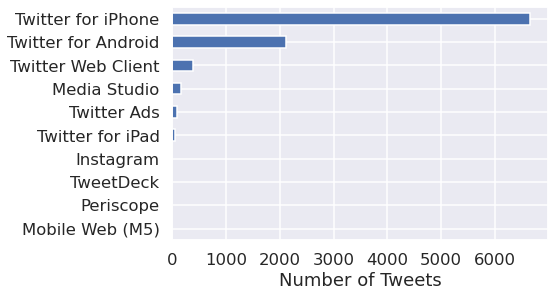

In [20]:
### BEGIN ANSWER
df_trump['source'].value_counts(ascending=True).plot.barh()
plt.xlabel('Number of Tweets')
### END ANSWER

### Task 3.4
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

**Note** - If your `time` column is not in datetime format, the following code will not work.

In [21]:
df_trump['time'].iloc[0:3]

id
999986971660423170   2018-05-25 12:14:07+00:00
999984507574018049   2018-05-25 12:04:20+00:00
999984503123857408   2018-05-25 12:04:19+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [22]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,source,text,retweet_count,est_time
id,,,,,
999986971660423170,2018-05-25 12:14:07+00:00,Twitter for iPhone,"Very good news to receive the warm and productive statement from North Korea. We will soon see where it will lead, hopefully to long and enduring prosperity and peace. Only time (and talent) will tell!",22984,2018-05-25 07:14:07-05:00
999984507574018049,2018-05-25 12:04:20+00:00,Twitter for iPhone,"Democrats are so obviously rooting against us in our negotiations with North Korea. Just like they are coming to the defense of MS 13 thugs, saying that they are individuals &amp; must be nurtured, or asking to end your big Tax Cuts &amp; raise your taxes instead. Dems have l...",25673,2018-05-25 07:04:20-05:00
999984503123857408,2018-05-25 12:04:19+00:00,Twitter for iPhone,"“Everyone knows there was a Spy, and in fact the people who were involved in the Spying are admitting that there was a Spy...Widespread Spying involving multiple people.” Mollie Hemingway, The Federalist Senior Editor But the corrupt Mainstream Media hates this monster story!",20810,2018-05-25 07:04:19-05:00
999984495179726848,2018-05-25 12:04:17+00:00,Twitter for iPhone,"Can anyone even imagine having Spies placed in a competing campaign, by the people and party in absolute power, for the sole purpose of political advantage and gain? And to think that the party in question, even with the expenditure of far more money, LOST!",22494,2018-05-25 07:04:17-05:00
999984492197613568,2018-05-25 12:04:16+00:00,Twitter for iPhone,"The Democrats are now alluding to the the concept that having an Informant placed in an opposing party’s campaign is different than having a Spy, as illegal as that may be. But what about an “Informant” who is paid a fortune and who “sets up” way earlier than the Russian Hoax?",17785,2018-05-25 07:04:16-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [23]:
df_trump['hour'] = df_trump['est_time'].apply(lambda x: x.hour+(x.minute/60)+(x.second/3600))
df_trump['roundhour']=round(df_trump['hour'])
df_trump['roundhour'].replace(24,0,inplace=True)

In [24]:
assert np.isclose(df_trump.loc["690171032150237184"]['hour'], 8.93639)


Use the `roundhour` column and plot the number of tweets at every hour of the day.
Order the plot using the hour of the day (1 to 24). Use seaborn `countplot`

[Text(0.5, 0, 'Hour of Day'),
 Text(0.5, 1.0, 'The hour of the day that Trump uses Twitter')]

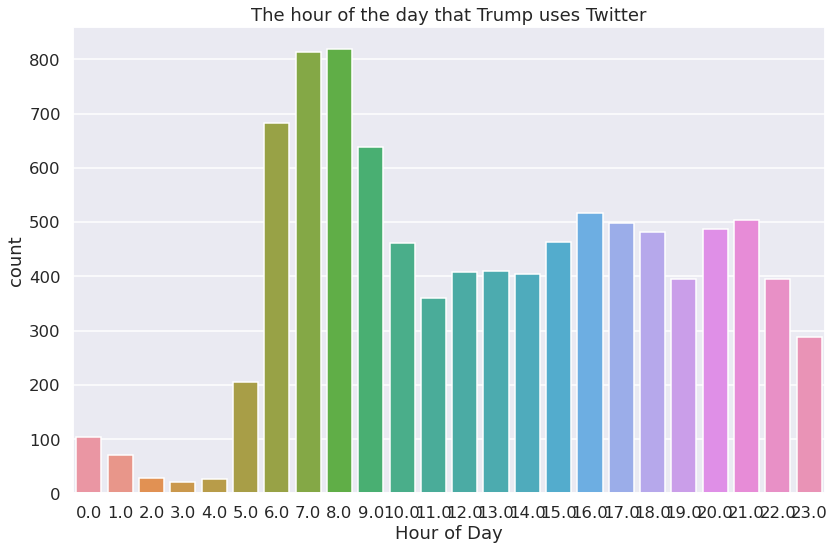

In [25]:
# make a bar plot here
### BEGIN ANSWER
plt.rcParams['figure.figsize'] = (12, 8)
ax = sns.countplot(data=df_trump, x='roundhour')
ax.set(xlabel = 'Hour of Day', title = 'The hour of the day that Trump uses Twitter')
### END ANSWER

Now, use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following.
<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 400px;"/>


/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


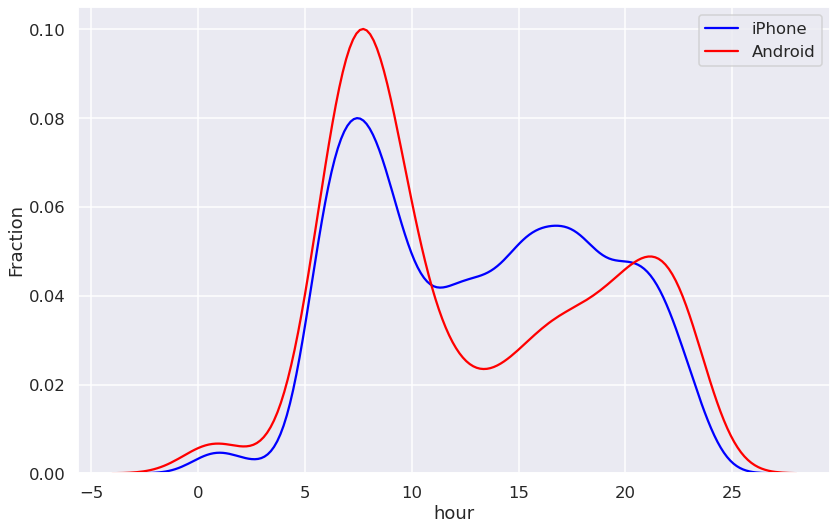

In [26]:
### BEGIN ANSWER
iphone = df_trump[(df_trump['source']=='Twitter for iPhone')]['hour']
android = df_trump[(df_trump['source']=='Twitter for Android')]['hour']
ax = sns.distplot(iphone, hist=False, kde=True, color='blue')
ax = sns.distplot(android, hist=False, kde=True, color='red')
ax.set(xlabel='hour', ylabel='Fraction')
plt.legend(labels=['iPhone', 'Android'])
plt.show()
### END ANSWER

### Task 3.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

Response: In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

\\
<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 600px;"/>


/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


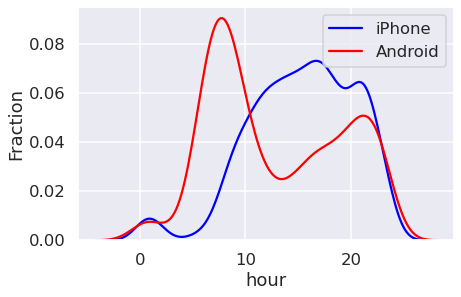

In [53]:
### BEGIN ANSWER
plt.rcParams['figure.figsize'] = (6, 4)
limit = pd.to_datetime('2017/01/01', utc='EST')
iphone = df_trump[(df_trump['source']=='Twitter for iPhone') & 
                  (df_trump['est_time']<limit)]['hour']
android = df_trump[(df_trump['source']=='Twitter for Android') &
                  (df_trump['est_time']<limit)]['hour']
ax = sns.distplot(iphone, hist=False, kde=True, color='blue')
ax = sns.distplot(android, hist=False, kde=True, color='red')
ax.set(xlabel='hour', ylabel='Fraction')
plt.legend(labels=['iPhone', 'Android'])
plt.show()
### END ANSWER

### Task 3.6
Edit this cell to answer the following questions.
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc)

Morning and night
* What time of the day the Android tweets were made by paid staff?

Afternoon and night

Note that these are speculations based on what you observe in the data set.

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [54]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

![title](images/source_years.png)

/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


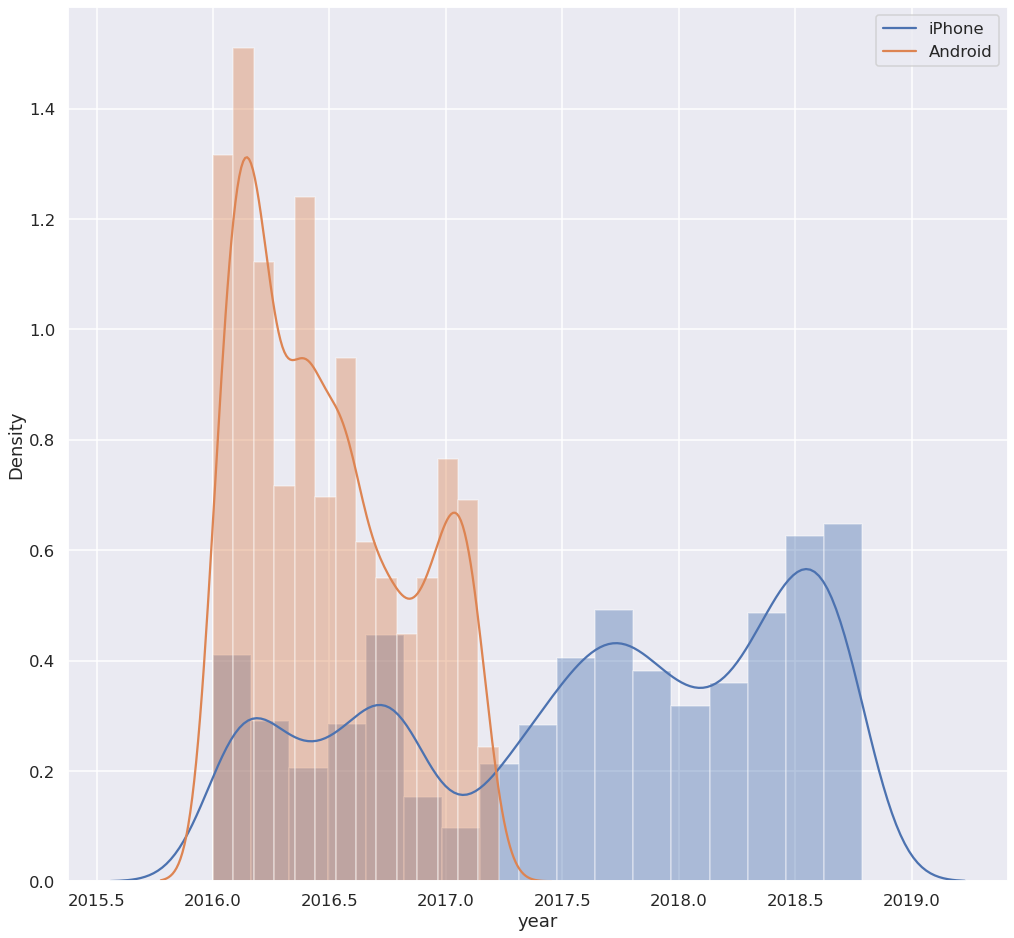

In [55]:
plt.figure(figsize=(15,15))
### BEGIN ANSWER
iphone = df_trump[df_trump['source']=='Twitter for iPhone']['year']
android = df_trump[df_trump['source']=='Twitter for Android']['year']
ax = sns.distplot(iphone, hist=True, kde=True)
ax = sns.distplot(android, hist=True, kde=True)
ax.set(xlabel='year')
plt.legend(labels=['iPhone', 'Android'])
plt.show()
### END ANSWER

## PART 4 - Sentiment Analysis  (group and individual)

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [30]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [31]:
### BEGIN ANSWER
df_sent = pd.read_table("data/vader_lexicon.txt", sep ='\t', usecols=[0,1], names=['token','polarity'])
df_sent.set_index('token', inplace=True)
df_sent
### END ANSWER

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
...,...
}:,-2.1
}:(,-2.0
}:),0.4


### Task 4.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [32]:
### BEGIN ANSWER
df_trump['text'] = df_trump['text'].str.lower()
df_trump
### END ANSWER

,time,source,text,retweet_count,est_time,hour,roundhour,year
id,,,,,,,,
999986971660423170,2018-05-25 12:14:07+00:00,Twitter for iPhone,"very good news to receive the warm and productive statement from north korea. we will soon see where it will lead, hopefully to long and enduring prosperity and peace. only time (and talent) will tell!",22984,2018-05-25 07:14:07-05:00,7.235278,7.0,2018.394521
999984507574018049,2018-05-25 12:04:20+00:00,Twitter for iPhone,"democrats are so obviously rooting against us in our negotiations with north korea. just like they are coming to the defense of ms 13 thugs, saying that they are individuals &amp; must be nurtured, or asking to end your big tax cuts &amp; raise your taxes instead. dems have l...",25673,2018-05-25 07:04:20-05:00,7.072222,7.0,2018.394521
999984503123857408,2018-05-25 12:04:19+00:00,Twitter for iPhone,"“everyone knows there was a spy, and in fact the people who were involved in the spying are admitting that there was a spy...widespread spying involving multiple people.” mollie hemingway, the federalist senior editor but the corrupt mainstream media hates this monster story!",20810,2018-05-25 07:04:19-05:00,7.071944,7.0,2018.394521
999984495179726848,2018-05-25 12:04:17+00:00,Twitter for iPhone,"can anyone even imagine having spies placed in a competing campaign, by the people and party in absolute power, for the sole purpose of political advantage and gain? and to think that the party in question, even with the expenditure of far more money, lost!",22494,2018-05-25 07:04:17-05:00,7.071389,7.0,2018.394521
999984492197613568,2018-05-25 12:04:16+00:00,Twitter for iPhone,"the democrats are now alluding to the the concept that having an informant placed in an opposing party’s campaign is different than having a spy, as illegal as that may be. but what about an “informant” who is paid a fortune and who “sets up” way earlier than the russian hoax?",17785,2018-05-25 07:04:16-05:00,7.071111,7.0,2018.394521
...,...,...,...,...,...,...,...,...
1000145873274359809,2018-05-25 22:45:32+00:00,Twitter for iPhone,funny to watch the democrats criticize trade deals being negotiated by me when they don’t even know what the deals are and when for 8 years the obama administration did nothing on trade except let other countries rip off the united states. lost almost $800 billion/year under “o”,30848,2018-05-25 17:45:32-05:00,17.758889,18.0,2018.394521
1000138164923781121,2018-05-25 22:14:54+00:00,Twitter for iPhone,"chicago police have every right to legally protest against the mayor and an administration that just won’t let them do their job. the killings are at a record pace and tough police work, which chicago will not allow, would bring things back to order fast...the killings must s...",24635,2018-05-25 17:14:54-05:00,17.248333,17.0,2018.394521
1000114139136606209,2018-05-25 20:39:26+00:00,Media Studio,"to the @navalacademy class of 2018, i say: we know you are up to the task. we know you will make us proud. we know that glory will be yours. because you are winners, you are warriors, you are fighters, you are champions, and you will lead us to victory! god bless the u.s.a.! ...",16909,2018-05-25 15:39:26-05:00,15.657222,16.0,2018.394521


### Task 4.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

In [33]:
# Save your regex in punct_re
punct_re = r'[^\w\s\\n]'


### BEGIN ANSWER
df_trump['no_punc']=df_trump['text'].str.replace(punct_re, ' ', regex=True)
### END ANSWER

In [34]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc["800329364986626048"] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc["884740553040175104"] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


### Task 4.4


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

You can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [35]:

### BEGIN ANSWER
temp = df_trump['no_punc'].str.split(expand=True)
temp = temp.stack()
temp.index.names=['id','num']
tidy_format = temp.reset_index('num')
print(tidy_format)
tidy_format.rename(columns={0:'word'},inplace=True)
tidy_format
### END ANSWER

                     num           0
id                                  
999986971660423170     0        very
999986971660423170     1        good
999986971660423170     2        news
999986971660423170     3          to
999986971660423170     4     receive
...                  ...         ...
1000061992042975232   26      aweigh
1000061992042975232   27       https
1000061992042975232   28           t
1000061992042975232   29          co
1000061992042975232   30  aolbk7y16a

[225001 rows x 2 columns]


,num,word
id,,
999986971660423170,0,very
999986971660423170,1,good
999986971660423170,2,news
999986971660423170,3,to
999986971660423170,4,receive
...,...,...
1000061992042975232,26,aweigh
1000061992042975232,27,https
1000061992042975232,28,t


In [36]:
assert tidy_format.loc["894661651760377856"].shape == (27, 2)
assert ' '.join(list(tidy_format.loc["894661651760377856"]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

### Task 4.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `df_trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `df_sent` tables and group the final answer.


In [37]:


### BEGIN ANSWER
temp = tidy_format.merge(right=df_sent,left_on='word',right_index=True)
temp = temp.groupby('id').sum()
df_trump['polarity'] = temp['polarity']
df_trump['polarity'] = df_trump['polarity'].fillna(0)
### END ANSWER
df_trump

,time,source,text,retweet_count,est_time,hour,roundhour,year,no_punc,polarity
id,,,,,,,,,,
999986971660423170,2018-05-25 12:14:07+00:00,Twitter for iPhone,"very good news to receive the warm and productive statement from north korea. we will soon see where it will lead, hopefully to long and enduring prosperity and peace. only time (and talent) will tell!",22984,2018-05-25 07:14:07-05:00,7.235278,7.0,2018.394521,very good news to receive the warm and productive statement from north korea we will soon see where it will lead hopefully to long and enduring prosperity and peace only time and talent will tell,8.8
999984507574018049,2018-05-25 12:04:20+00:00,Twitter for iPhone,"democrats are so obviously rooting against us in our negotiations with north korea. just like they are coming to the defense of ms 13 thugs, saying that they are individuals &amp; must be nurtured, or asking to end your big tax cuts &amp; raise your taxes instead. dems have l...",25673,2018-05-25 07:04:20-05:00,7.072222,7.0,2018.394521,democrats are so obviously rooting against us in our negotiations with north korea just like they are coming to the defense of ms 13 thugs saying that they are individuals amp must be nurtured or asking to end your big tax cuts amp raise your taxes instead dems have l...,1.4
999984503123857408,2018-05-25 12:04:19+00:00,Twitter for iPhone,"“everyone knows there was a spy, and in fact the people who were involved in the spying are admitting that there was a spy...widespread spying involving multiple people.” mollie hemingway, the federalist senior editor but the corrupt mainstream media hates this monster story!",20810,2018-05-25 07:04:19-05:00,7.071944,7.0,2018.394521,everyone knows there was a spy and in fact the people who were involved in the spying are admitting that there was a spy widespread spying involving multiple people mollie hemingway the federalist senior editor but the corrupt mainstream media hates this monster story,-1.9
999984495179726848,2018-05-25 12:04:17+00:00,Twitter for iPhone,"can anyone even imagine having spies placed in a competing campaign, by the people and party in absolute power, for the sole purpose of political advantage and gain? and to think that the party in question, even with the expenditure of far more money, lost!",22494,2018-05-25 07:04:17-05:00,7.071389,7.0,2018.394521,can anyone even imagine having spies placed in a competing campaign by the people and party in absolute power for the sole purpose of political advantage and gain and to think that the party in question even with the expenditure of far more money lost,5.5
999984492197613568,2018-05-25 12:04:16+00:00,Twitter for iPhone,"the democrats are now alluding to the the concept that having an informant placed in an opposing party’s campaign is different than having a spy, as illegal as that may be. but what about an “informant” who is paid a fortune and who “sets up” way earlier than the russian hoax?",17785,2018-05-25 07:04:16-05:00,7.071111,7.0,2018.394521,the democrats are now alluding to the the concept that having an informant placed in an opposing party s campaign is different than having a spy as illegal as that may be but what about an informant who is paid a fortune and who sets up way earlier than the russian hoax,-2.0
...,...,...,...,...,...,...,...,...,...,...
1000145873274359809,2018-05-25 22:45:32+00:00,Twitter for iPhone,funny to watch the democrats criticize trade deals being negotiated by me when they don’t even know what the deals are and when for 8 years the obama administration did nothing on trade except let other countries rip off the united states. lost almost $800 billion/year under “o”,30848,2018-05-25 17:45:32-05:00,17.758889,18.0,2018.394521,funny to watch the democrats criticize trade deals being negotiated by me when they don t even know what the deals are and when for 8 years the obama administration did nothing on trade except let other countries rip off the united states lost almost 800 billion year u

In [38]:
assert np.allclose(df_trump.loc["744701872456536064", 'polarity'], 8.4)
assert np.allclose(df_trump.loc["745304731346702336", 'polarity'], 2.5)
assert np.allclose(df_trump.loc["744519497764184064", 'polarity'], 1.7)
assert np.allclose(df_trump.loc["894661651760377856", 'polarity'], 0.2)
assert np.allclose(df_trump.loc["894620077634592769", 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
#assert np.allclose(df_trump.loc[744355251365511169, 'polarity'], 0.0)


### Task 4.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the most positive and most negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [39]:
print('Most negative tweets:')

### BEGIN ANSWER
for index,row in df_trump.sort_values(by='polarity', ascending=True).head().iterrows():
    print(row['text'])
    print()
### END ANSWER

Most negative tweets:
it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

james comey is a proven leaker &amp; liar. virtually everyone in washington thought he should be fired for the terrible job he did-until he was, in fact, fired. he leaked classified information, for which he should be prosecuted. he lied to congress under oath. he is a weak and.....

this is an illegally brought rigged witch hunt run by people who are totally corrupt and/or conflicted. it was started and paid for by crooke

In [40]:
print('Most positive tweets:')

### BEGIN ANSWER
for index,row in df_trump.sort_values(by='polarity', ascending=False).head().iterrows():
    print(row['text'])
    print()
### END ANSWER

Most positive tweets:
congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new poll says trump, at over 90%, is the most popular republican in history of the party. wow!

it was my great honor to deliver a message at the marine corps air station miramar to our great u.s. military, straight from the heart of the american people: we support you, we thank you, we love you

### Task 4.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

![title](images/nyt_vs_fox.png)

/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


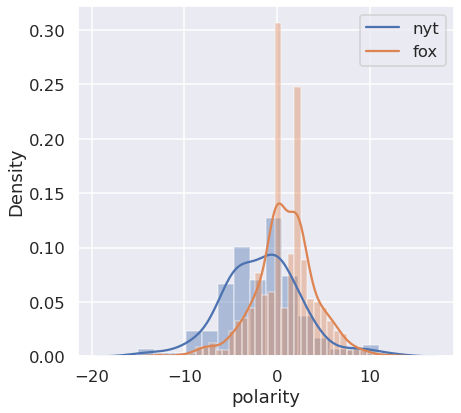

In [41]:
### BEGIN ANSWER
nyt = df_trump[df_trump['no_punc'].str.contains('nyt')]['polarity']
fox = df_trump[df_trump['no_punc'].str.contains('fox')]['polarity']
ax = sns.distplot(nyt, hist=True, kde=True)
ax = sns.distplot(fox, hist=True, kde=True)
plt.legend(labels=['nyt', 'fox'])
plt.show()
### END ANSWER

##### Comment on what you observe:

#### BEGIN ANSWER
The tweets on fox is slightly more positive on polarity than nyt. Trump might have a more positive altitude towards fox than nyt.
Tweets on nyt is more negative and tweets on fox is more possitive. Trump like fox but dislike nyt.

#### END ANSWER

## PART 5 - Principal Component Analysis (PCA) and Twitter  (group and individual)
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like Make America Great Again. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). Lecture 6.1 captures some sparse matrix routines you can use.
Print the first 10 rows of the df to show the matrix you created

Start with the `tidy_format` dataframe

In [42]:
## code to plot the first 10 rows of the matrix
import nltk
import nltk.corpus
nltk.download('stopwords')
nltk.download('wordnet')

#create a dataframe called tmp to store all words appear in the tweets
tmp = tidy_format.drop('num',axis=1)


#remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
stopwords.extend(['rt','t','co','https','realdonaldtrump','amp',"u",'hillary','trump2016','trump','clinton','http','ha','wa'])
tmp = tmp[~tmp['word'].isin(stopwords)]

#deal with plurals
from nltk.stem.wordnet import WordNetLemmatizer
Lem = WordNetLemmatizer()
def lem(x):
    return Lem.lemmatize(x)
tmp['word'] = tmp.word.apply(lem)

# Remove numbers
tmp = tmp[~(tmp['word'].str.isnumeric())]

#Remove words with only 1 or 2 length
tmp = tmp[(tmp['word'].str.len() > 2)]

#get top50 words
tmp = tmp.reset_index()
top50 = tmp['word'].value_counts(ascending=False).nlargest(50).to_frame()

tmp2 = tmp[tmp['word'].isin(top50.reset_index()['index'])]

idlist = tmp2['id'].unique()
idlist.sort()
idlist = idlist[:5000]

#create the tf-matrix
matrix = np.zeros((5000,50))
top50 = top50.reset_index()
for a in range(5000):
    for b in range(50):
        if (top50['index'][b]) in df_trump['no_punc'].loc[idlist[a]]:
            matrix[a][b] += 1

print(matrix[:10])
top50


[nltk_data] Downloading package stopwords to
[nltk_data]     /common/home/xm73/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /common/home/xm73/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

,index,word
0,great,1742
1,thank,1014
2,people,821
3,america,638
4,president,595
5,country,577
6,job,573
7,big,538
8,time,515
9,make,500


### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [43]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA
### BEGIN ANSWER
pca = PCA(n_components=50)
pca.fit(matrix)
print(pca.components_)
print(pca.explained_variance_ratio_)
### END ANSWER

[[ 5.86202159e-01  1.90323539e-01 -3.13832348e-02 ...  2.72474588e-02
  -2.34567806e-02  1.00084346e-02]
 [ 1.67419684e-01 -4.62442070e-02  2.35474038e-02 ... -2.25009794e-02
  -1.93098550e-02  7.01166980e-02]
 [ 3.27921786e-01 -7.65935661e-01  1.51732490e-01 ... -4.00623419e-02
   2.19839319e-02 -3.48735538e-02]
 ...
 [ 6.46004476e-03 -6.81464741e-03 -3.11627241e-03 ... -2.47231379e-02
   5.92864129e-03 -4.11446462e-03]
 [-3.59378314e-03 -6.20139865e-03  1.66215292e-03 ...  1.30722320e-02
  -9.02984318e-03 -8.82346873e-04]
 [-6.77223679e-05 -1.12766459e-04  2.93629257e-04 ... -1.03159269e-04
   1.94466948e-04  2.61386164e-04]]
[1.17843907e-01 5.53401316e-02 5.13012657e-02 5.02862451e-02
 4.09507541e-02 3.80763840e-02 3.49866058e-02 3.14276860e-02
 2.65980980e-02 2.57400889e-02 2.45731500e-02 2.41845792e-02
 2.33171627e-02 2.11963154e-02 1.99408471e-02 1.96404326e-02
 1.90111807e-02 1.78039491e-02 1.76970574e-02 1.64636941e-02
 1.61297064e-02 1.57383940e-02 1.53884194e-02 1.46465679e-0

### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. 

![title](images/pca.png)



<AxesSubplot:>

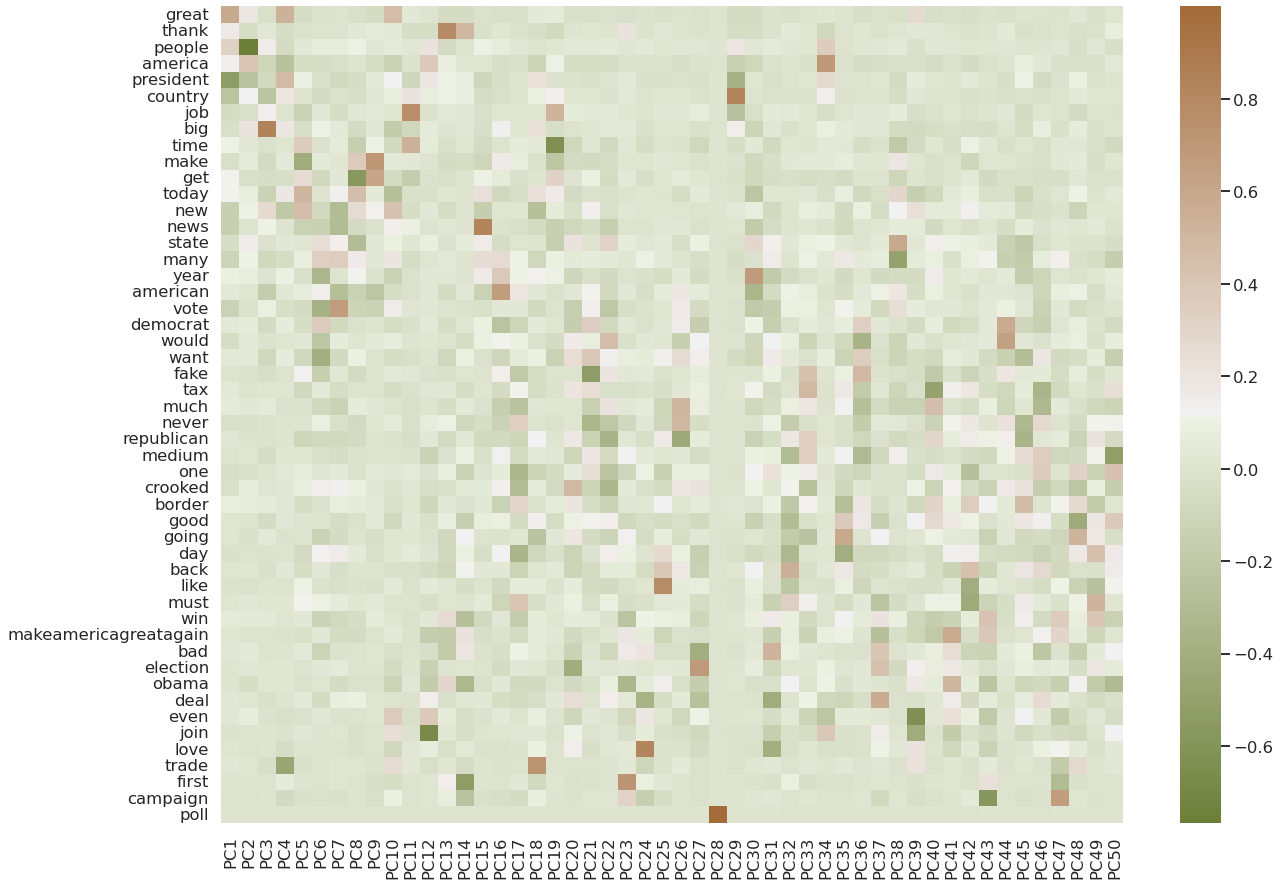

In [44]:
cmap = sns.diverging_palette(100, 400,as_cmap=True)
### BEGIN ANSWER
plt.rcParams['figure.figsize'] = (18, 14)
xticklabels=[]
for i in range(1,51):
    xticklabels.append('PC'+str(i))
sns.heatmap(data=pca.components_, cmap=cmap, yticklabels=top50['index'], xticklabels=xticklabels)
### END ANSWER

### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot 

![title](images/PC1_PC2.png)

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

/koko/system/anaconda/envs/python39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


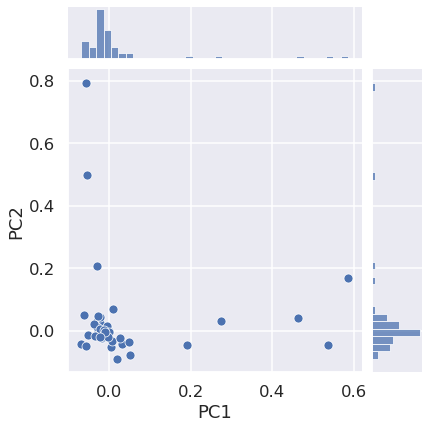

In [45]:
### BEGIN ANSWER
plt.rcParams['figure.figsize'] = (6, 6)
# ax = sns.JointGrid(x=pca.components_[0], y=pca.components_[1])
# ax.plot(sns.scatterplot, sns.histplot)
h = sns.jointplot(pca.components_[0], pca.components_[1])
h.set_axis_labels('PC1', 'PC2')
### END ANSWER

## PART 6 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

### Task 6.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~5-7 pandas commands and get everything done on one line.

In [46]:
### BEGIN ANSWER
temp = tmp.value_counts().to_frame().reset_index()
top_20 = pd.DataFrame({'word': temp['word'].drop_duplicates(), 'retweet_count': 0, 'tweet_count': 0}).set_index('word')
for index, row in temp.iterrows():
    top_20.loc[row['word']]['retweet_count'] += df_trump.loc[row['id']]['retweet_count']
    top_20.loc[row['word']]['tweet_count'] += 1
top_20 = top_20[top_20['tweet_count'] >= 25].apply(lambda x: x['retweet_count']/x['tweet_count'], axis=1).to_frame(name='retweet_count').sort_values(by='retweet_count',ascending=False).head(20)
top_20
### END ANSWER

,retweet_count
word,
jong,40874.071429
kim,32706.818182
maybe,30254.640000
kavanaugh,28651.962963
try,28150.125000
old,27613.151515
mccabe,27119.560000
illegally,26787.096774
lowest,26374.333333


### Task 6.2
Plot a bar chart of your results:

<AxesSubplot:ylabel='word'>

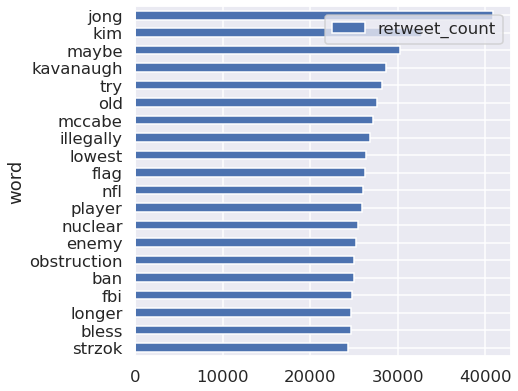

In [47]:
### BEGIN ANSWER
# sns.barplot(data=top_20, x='retweet_count', y=top_20.index)
top_20 = top_20.sort_values(by='retweet_count', ascending = True)
top_20.plot.barh()
### END ANSWER

## PART 7 - Kim Jong Un and Musk Tweet Analysis (Optional for Individual)
What else can we do? Let us ask some open ended questions.

### Task 7.1
"kim", "jong" and "un" are apparently really popular in Trump's tweets! It seems like we can conclude that his tweets involving jong are more popular than his other tweets. Or can we?

Consider each of the statements about possible confounding factors below. State whether each statement is true or false and explain. If the statement is true, state whether the confounding factor could have made kim jong un related tweets higher in the list than they should be.

1. We didn't restrict our word list to nouns, so we have unhelpful words like "let" and "any" in our result.
      - That might be why 'un' is the most popular.
1. We didn't remove hashtags in our text, so we have duplicate words (eg. #great and great).
      - Some may only have '#great' not 'great' which make the average lower
1. We didn't account for the fact that Trump's follower count has increased over time.
      - This can affect a lot. As Trump's follower count has increased, the more popular every word be

In [48]:
#plt.figure(figsize=(20,20))

### BEGIN ANSWER
   
# your solution here

### END ANSWER

### Task 7.2
Using the `df_trump` tweets construct an interesting plot describing a property of the data and discuss what you found below.

**Ideas:**

1. How has the sentiment changed with length of the tweets?
1. Does sentiment affect retweet count?
1. Are retweets more negative than regular tweets?
1. Are there any spikes in the number of retweets and do the correspond to world events? 
1. What terms have an especially positive or negative sentiment?

You can look at other data sources and even tweets. Do some plots and discuss. You can add more cells here as needed.


In [49]:
### BEGIN ANSWER
   
# your solution here

### END ANSWER

#### BEGIN ANSWER
Discussion: "Enter question you tried answering"

Answer:
#### END ANSWER

### Task 7.3 - Elon Musk and Twitter
Elon Musk purchased Twitter in October 2022. In November, 2022, he laid off over 50% of the employees. In this task, extract the tweets from 2022 (where the conversation about twitter purchase began.

In [50]:
### BEGIN ANSWER
   
# your solution here

### END ANSWER

### Task 7.4 - Elon Musk and PCA
Using a heatmap similar to Task 5.3, find the most dominant principal components of his tweets. 

In [51]:
### BEGIN ANSWER
   
# your solution here

### END ANSWER

### Task 7.5 - Elon Musk Twitter Analysis
Do a thorough analysis of how Elon Musk tweets emphasized why he want to buy twitter. This is an open ended question and be as detailed as possible.

### BEGIN ANSWER
   
# your analysis here

### END ANSWER

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as yourSection_yourNetID_midsemester.jpynb<br>
<b> Group Projects:</b> Each person in the group must submit a copy with both names listed and your partners contribution answered. If you are doing a group project, you must inform your TA prior to 11/10/22 that you intend to work as a group and submit your name and your partner name via the form. We will <b>not accept group work</b> if your TA has not been notified.<br>
<b> Submit To: </b> Codebench (remove all output. Do not submit data files<br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

Created by Andy Guna @2019-2022 Credits: Josh Hug, and Berkeley Data Science Group, Steve Skiena, David Rodreguez

@ Copyrighted Material. DO NOT post online.